# Introduction 

In this notebook we are going to study if there is a correlation between the ouput of a country and the life expectancy of its inhabitants. However this is not the only aim of our work, because in parallel we are going to explain some computational and statical aspects.

These are some of the steps that we will follow:
+ Prepare the data.
+ Apply statistics to our data.
+ Represent with plots some aspects of our data.

**Data sources** 

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import libraries

In this work we need the following aditional python modules:
 
- **NumPy**. Fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays. ([link](https://numpy.org/doc/stable/user/whatisnumpy.html))
- **Pandas**. Fundamental for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.
- matplotlib
- seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('all_data.csv') # load the data into pandas dataframe
df.head() # inspect the data

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The column name `Life expectancy at birth (years)` can be problematic to handle, so we will change for another one more convinient. 

In [6]:
df = df.rename(columns={"Life expectancy at birth (years)": 'leaby'})
df = df.rename(columns=str.lower) # change all column name to lowercase for consistency

In [7]:
# find out how many countries are considered in this dataset
df.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In the dataset are considered the following countries: 'Chile', 'China', 'Germany', 'Mexico', 'United States of America' and 'Zimbabwe'.

In [8]:
# find out years considered 
df.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

The chronological scope of data is 2000-2015

In [9]:
df.head()

,country,year,leaby,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Relation between year and life expectancy

In [10]:
year_life_df = df.pivot_table(values="leaby", index="year")

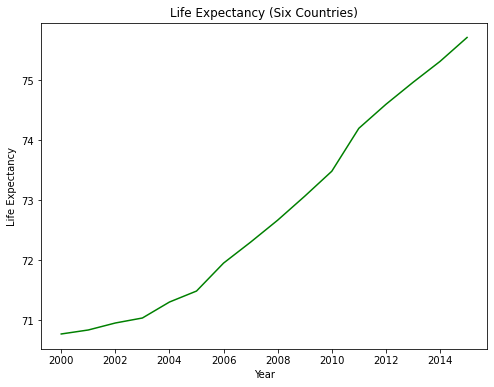

In [12]:
plt.figure(figsize=(8, 6))

plt.plot(year_life_df.index, year_life_df.leaby, color='green') 

plt.title('Life Expectancy (Six Countries)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

plt.show()

It is clear that there is a improve in life expectancy from 2000 to 2015.

## Life expectancy through time in every country

In [13]:
df.country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

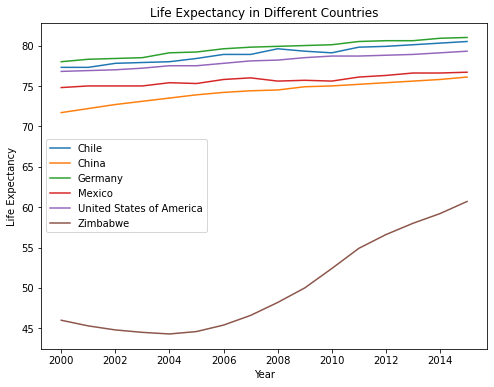

In [13]:
plt.figure(figsize=(8, 6))

for i in list(df.country.unique()):
    new_df = df[df['country'] == i]
    plt.plot(new_df.year, new_df.life_expectancy)

plt.title('Life Expectancy in Different Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(df.country.unique())

plt.show()